In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np
import cv2
import random


DS = Path("../../datasets/")
BASE = DS / "T005-download-external"
DOWNLOADS = Path.home() / "Downloads"
IMAGES = BASE / "images"

IMAGES.mkdir(parents=True, exist_ok=True)

In [18]:
from mtrain.seg.cityscapes import get_cached_seg_former, CityScapesCls

In [5]:
segf = get_cached_seg_former()

/Users/hariomnarang/Desktop/personal/roads/mtrain/.venv/lib/python3.12/site-packages/transformers/models/segformer/feature_extraction_segformer.py:30: FutureWarning: The class SegformerFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use SegformerImageProcessor instead.
  warnings.warn(
/Users/hariomnarang/Desktop/personal/roads/mtrain/.venv/lib/python3.12/site-packages/transformers/models/segformer/feature_extraction_segformer.py:35: UserWarning: The following named arguments are not valid for `SegformerFeatureExtractor.__init__` and were ignored: 'feature_extractor_type', 'reduce_labels'
  super().__init__(*args, **kwargs)


In [7]:
SAMPLES = [DOWNLOADS / "big-4.jpg"]

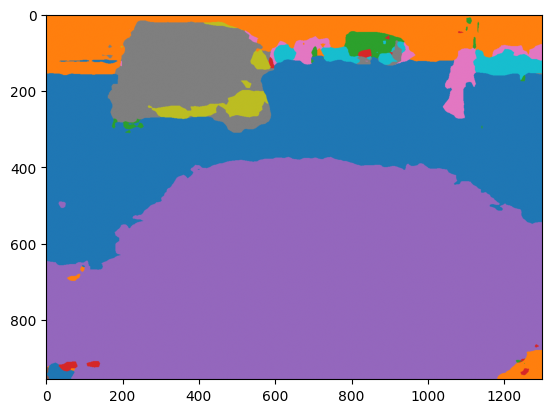

In [12]:
plt.imshow(segf.predict(SAMPLES[0]), cmap="tab10")

In [24]:

CLS_ID_BY_LABEL = {
    c.value: c.name
    for c in CityScapesCls
}
print(CLS_ID_BY_LABEL)

def show_segmentation_with_labels(image_bgr, pred_mask):
    """
    image_bgr : (H, W, 3) BGR numpy array
    pred_mask : (H, W) int segmentation mask
    """

    plt.figure(figsize=(10, 6))
    plt.imshow(pred_mask, cmap="tab20")
    plt.axis("off")

    classes = np.unique(pred_mask)

    for cls_id in classes:
        if cls_id in CLS_ID_BY_LABEL:
            label = CLS_ID_BY_LABEL[cls_id]
        else:
            label = str(cls_id)
        ys, xs = np.where(pred_mask == cls_id)
        if len(xs) == 0:
            continue

        y = int(ys.mean())
        x = int(xs.mean())

        plt.text(
            x, y,
            label,
            color="white",
            fontsize=12,
            ha="center",
            va="center",
            bbox=dict(facecolor="black", alpha=0.6, pad=2)
        )

    plt.show()

{0: 'ROAD', 1: 'SIDEWALK', 2: 'BUILDING', 3: 'WALL', 4: 'FENCE', 5: 'POLE', 6: 'TRAFFIC_LIGHT', 7: 'TRAFFIC_SIGN', 8: 'VEGETATION', 9: 'TERRAIN', 10: 'SKY', 11: 'PERSON', 12: 'RIDER', 13: 'CAR', 14: 'TRUCK', 15: 'BUS', 16: 'TRAIN', 17: 'MOTORCYCLE', 18: 'BICYCLE'}


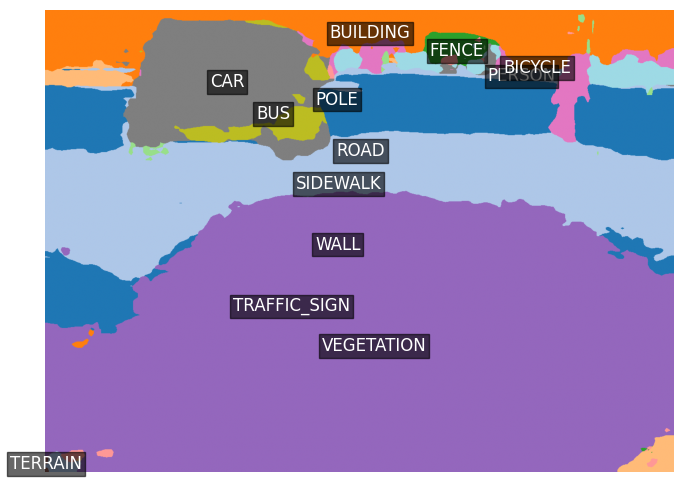

In [25]:
from PIL import Image
import numpy as np


img_bgr = cv2.imread(SAMPLES[0])
pred = segf.predict_bgr_image(img_bgr)

show_segmentation_with_labels(img_bgr, pred)

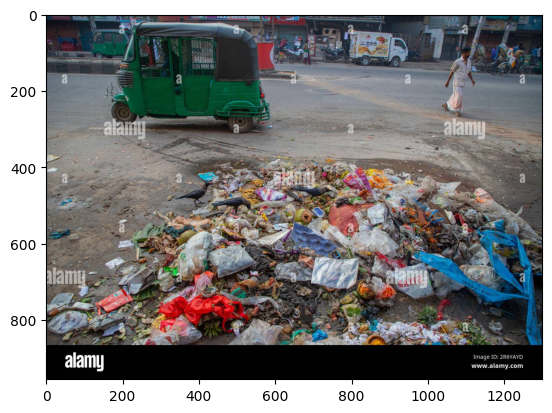

In [ ]:
plt.imshow(plt.imread(SAMPLES[0]))